#지도 한글 설정

In [ ]:
! pip uninstall -y datascience

In [ ]:
! pip uninstall -y branca

Uninstalling branca-0.4.1+3.g5887b9b:
  Successfully uninstalled branca-0.4.1+3.g5887b9b


In [ ]:
! pip install git+https://github.com/python-visualization/branca.git@master

  Cloning https://github.com/python-visualization/branca.git (to revision master) to /tmp/pip-req-build-0mlzm6zx
  Running command git clone -q https://github.com/python-visualization/branca.git /tmp/pip-req-build-0mlzm6zx
  Created wheel for branca: filename=branca-0.4.1+3.g5887b9b-cp36-none-any.whl size=24523 sha256=ba0b67079905324cc1814a8982953268cae5c0765c436395c1a5a1587dd044b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-m4kr6jvz/wheels/14/bc/41/d6078abe73beea93d98c014bba54c395224cabb54f95b9d248
Successfully built branca


#그래프 관련 객체 및 그래프 한글 설정

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%config InlineBackend.figure_format = 'retina' #그래프의 글자를 선명하게 출력하도록 설정 
!apt -qq -y install fonts-nanum #나눔 글자체 설치 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' #나눔고딕 글자체의 전체 경로 설정
font = fm.FontProperties(fname=fontpath, size=9) #글자체의 경로와 글자 크기 설정

plt.rc('font', family='NanumBarunGothic')  #폰트 이름 설정
mpl.font_manager._rebuild() #폰트 업데이트

In [ ]:
plt.style.use("ggplot") #ggplot 스타일을 사용하도록 설정

#데이터 로드

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%ls /gdrive/My\ Drive/Colab\ Notebooks #구글 드라이브 폴더 조회(폴더 내 파일명 출력)

 0622_1                     '0709 대중교통'
 0622_2                     '0709 아파트.ipynb'
 0622_3                     '0709 자습 PART7 머신러닝 - 회귀분석'
 0623_1                     '0709 자습 PART7 머신러닝-의사결정나무'
 0623_2                     '0709 자습 PART7 머신러닝 - KMeans'
 0624_1                     '0709 자습 PART7 머신러닝 - KNN, SVM.ipynb'
 0624_2                     '0710 PART4(0713 수업)'
 0625_1                     '0710 자습 PART7 머신러닝 - DBSCAN.ipynb'
 0625_2                     '0713 분산, 공분산, 상관관계'
'0626_1 '                   '0713 CCTV'
 0626_2                     '0715 지도 시각화'
 0629                       '0715 스타벅스, 이디야'
 0630                       '0715 상권 정보 분석.ipynb'
'0630 데이터 크롤링'        '0716 스타벅스, 이디야_부산'
 0701                        상가업소정보_201912.csv
'0701 복습'                 'Colaboratory HELP'
'0701 쇼핑몰 크롤링.ipynb'   shop.csv
'0708 Pandas'    

In [ ]:
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/상가업소정보_201912.csv", encoding = "UTF-8") #데이터 로드

#데이터 조회

In [ ]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1.168010e+18,1,대지,604,NaN,서울특별시 강남구 대치동 604,1.168020e+11,서울특별시 강남구 남부순환로,2933,NaN,1.168010e+24,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1.0,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1.168010e+18,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,1.168040e+11,서울특별시 강남구 선릉로93길,6,NaN,1.168010e+24,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1.0,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1.154510e+18,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,1.154530e+11,서울특별시 금천구 가산로,34,6.0,1.154510e+24,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1.0,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2.653010e+18,1,대지,578,NaN,부산광역시 사상구 괘법동 578,2.653030e+11,부산광역시 사상구 괘감로,37,NaN,2.653010e+24,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1.0,26.0,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1.171010e+18,1,대지,256,NaN,서울특별시 송파구 석촌동 256,1.171030e+11,서울특별시 송파구 가락로,71,NaN,1.171010e+24,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1.0,NaN,127.104071,37.500249


In [ ]:
df.info() #데이터의 전체적인 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

#사용하지 않는 컬럼 삭제

In [ ]:
column_name = ["상호명", "상권업종대분류명", "상권업종중분류명", "도로명주소", "시도명", "시군구명", "경도", "위도"] #사용할 컬럼만 따로 모아서 확인
df = df[column_name]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   도로명주소     573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   경도        573680 non-null  float64
 7   위도        573680 non-null  float64
dtypes: float64(2), object(6)
memory usage: 35.0+ MB


In [ ]:
df["상권업종중분류명"].unique()

array(['유흥주점', '커피점/카페', '패스트푸드', '대중목욕탕/휴게', '일식/수산물', '분식', '한식',
       '음/식료품소매', '건강/미용식품', '선물/팬시/기념품', '양식', '중식', '종합소매점', '병원',
       '화장품소매', '학원-어학', '의복의류', 'PC/오락/당구/볼링등', '별식/퓨전요리', '학원-자격/국가고시',
       '도서관/독서실', '가정/주방/인테리어', '학원-음악미술무용', '무도/유흥/가무', '이/미용/건강',
       '사진/광학/정밀기기소매', '세탁/가사서비스', '닭/오리요리', '책/서적/도서', '예식/의례/관혼상제',
       '광고/인쇄', '학원-예능취미체육', '운송/배달/택배', '기타음식업', '부동산중개', '주유소/충전소',
       '철물/난방/건설자재소매', '유아교육', '주택수리', '사무/문구/컴퓨터', '약국/한약방', '물품기기대여',
       '자동차/이륜차', '자동차/자동차용품', '가구소매', '개인/가정용품수리', '학원-보습교습입시', '기타판매업',
       '유사의료업', '학원기타', '개인서비스', '시계/귀금속소매', '사진', '요가/단전/마사지', '학문교육기타',
       '가방/신발/액세서리', '대행업', '페인트/유리제품소매', '중고품소매/교환', '인력/고용/용역알선',
       '애견/애완/동물', '음식배달서비스', '가전제품소매', '유아용품', '학원-컴퓨터', '기타서비스업',
       '운동/경기용품소매', '장례/묘지', '법무세무회계', '취미/오락관련소매', '연극/영화/극장',
       '평가/개발/관리', '수의업', '호텔/콘도', '모텔/여관/여인숙', '분양', '제과제빵떡케익',
       '학원-창업취업취미', '의약/의료품소매', '행사/이벤트', '경마/경륜/성인오락', '예술품/골동품/수석/분재',
       '부페', '의료관련서비스업'

#조건에 맞는 데이터 조회

##부산만 따로 보기

In [ ]:
df_busan = df[df["시도명"] == "부산광역시"].copy() #copy(): 새로운 변수에 데이터프레임 복사본을 할당

In [ ]:
df_busan

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도
3,싱싱커피&토스트,음식,패스트푸드,부산광역시 사상구 괘감로 37,부산광역시,사상구,128.980455,35.159774
28,동해제일산오징어,음식,일식/수산물,부산광역시 동래구 아시아드대로220번길 30,부산광역시,동래구,129.068324,35.202902
29,리지호프소주,음식,양식,부산광역시 부산진구 범일로 166,부산광역시,부산진구,129.059574,35.144776
31,마니쩜,음식,유흥주점,부산광역시 부산진구 대학로 64-1,부산광역시,부산진구,129.034302,35.150069
32,경주아구찜,음식,일식/수산물,부산광역시 수영구 수영로 381-8,부산광역시,수영구,129.106330,35.141176
...,...,...,...,...,...,...,...,...
573653,간단하지만특별한화피디Cafe,학문/교육,도서관/독서실,부산광역시 영도구 중리로 35,부산광역시,영도구,129.068056,35.074041
573657,한국비상영재교육,학문/교육,학원기타,부산광역시 서구 구덕로 258,부산광역시,서구,129.020431,35.107893
573665,엘샤론염색방,생활서비스,이/미용/건강,부산광역시 사상구 엄궁남로 19,부산광역시,사상구,128.970343,35.125287
573666,더바램,생활서비스,이/미용/건강,부산광역시 남구 수영로325번길 61,부산광역시,남구,129.100028,35.140927


## 일부 텍스트가 들어가 있는 데이터만 가져오기 


*   상호명에서 브랜드명 추출
*   오타 방지를 위해 스타벅스(STARBUCKS), 이디야(EDIYA)



In [ ]:
df_busan = df_busan[df_busan["상호명"].isna() != True] #"상호명"이 존재하는 데이터만 추출
df_busan["상호명_소문자"] = df_busan["상호명"].str.lower() #"상호명 컬럼"에 저장된 영어를 소문자로 변환, 새로운 컬럼 "상호명_소문자"에 저장

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_busan[df_busan["상호명_소문자"].str.contains("이디야|이디아|ediya")] #"상호명_소문자" 컬럼에서 이디야, 이디아, 또는 ediya 문자열을 포함한 행만 조회

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자
2056,이디야커피,음식,한식,부산광역시 동래구 연안로 59,부산광역시,동래구,129.107693,35.193129,이디야커피
2206,이디야커피,음식,커피점/카페,부산광역시 사하구 다대로 682,부산광역시,사하구,128.966690,35.048200,이디야커피
28306,이디야커피,음식,커피점/카페,부산광역시 영도구 태종로 104,부산광역시,영도구,129.042133,35.091114,이디야커피
39125,이디야커피,음식,커피점/카페,부산광역시 부산진구 엄광로 184,부산광역시,부산진구,129.034613,35.147723,이디야커피
50526,이디야커피,음식,커피점/카페,부산광역시 동래구 안남로 32,부산광역시,동래구,129.095617,35.194194,이디야커피
...,...,...,...,...,...,...,...,...,...
544780,이디야커피,음식,커피점/카페,부산광역시 북구 덕천로 299,부산광역시,북구,129.036574,35.209767,이디야커피
547414,이디아커피,음식,커피점/카페,부산광역시 해운대구 좌동순환로 307-1,부산광역시,해운대구,129.183245,35.168564,이디아커피
548499,이디아커피,음식,커피점/카페,부산광역시 남구 용호로 34,부산광역시,남구,129.107766,35.126497,이디아커피
564596,이디아메이크업,생활서비스,이/미용/건강,부산광역시 부산진구 황령대로 13,부산광역시,부산진구,129.060850,35.148370,이디아메이크업


In [ ]:
df_busan[df_busan["상호명_소문자"].str.contains("스타벅스|starbuks")] #"상호명_소문자" 컬럼에서 스타벅스 또는 starbucks 문자열을 포함한 행만 조회

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자
40146,스타벅스,생활서비스,광고/인쇄,부산광역시 남구 수영로 345,부산광역시,남구,129.103527,35.139985,스타벅스
46932,스타벅스,생활서비스,광고/인쇄,부산광역시 해운대구 센텀2로 25,부산광역시,해운대구,129.132980,35.166962,스타벅스
49170,스타벅스,음식,커피점/카페,부산광역시 해운대구 해운대해변로298번길 24,부산광역시,해운대구,129.166605,35.160216,스타벅스
50148,스타벅스,음식,커피점/카페,부산광역시 남구 수영로 240-1,부산광역시,남구,129.093068,35.134951,스타벅스
61552,스타벅스,음식,커피점/카페,부산광역시 남구 문현금융로 40,부산광역시,남구,129.065885,35.146505,스타벅스
...,...,...,...,...,...,...,...,...,...
534607,스타벅스,음식,커피점/카페,부산광역시 금정구 중앙대로 1728,부산광역시,금정구,129.092819,35.238594,스타벅스
538255,스타벅스,음식,커피점/카페,부산광역시 부산진구 서면로 49-1,부산광역시,부산진구,129.057559,35.155268,스타벅스
543226,스타벅스,음식,커피점/카페,부산광역시 해운대구 해운대해변로 197,부산광역시,해운대구,129.152865,35.158824,스타벅스
544779,스타벅스,생활서비스,광고/인쇄,부산광역시 사하구 낙동대로 455,부산광역시,사하구,128.968878,35.105350,스타벅스


In [ ]:
df_busan[df_busan["상호명_소문자"].str.contains("투썸플레이스|twosomeplace")]

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자
13852,투썸플레이스부산역점,음식,커피점/카페,부산광역시 동구 중앙대로 201,부산광역시,동구,129.039393,35.115403,투썸플레이스부산역점
34535,투썸플레이스서면일번가점,음식,커피점/카페,부산광역시 부산진구 중앙대로691번길 32,부산광역시,부산진구,129.057254,35.154558,투썸플레이스서면일번가점
195719,투썸플레이스,음식,커피점/카페,부산광역시 금정구 중앙대로 1935,부산광역시,금정구,129.091091,35.257196,투썸플레이스
211427,투썸플레이스,음식,커피점/카페,부산광역시 해운대구 해운대로 584,부산광역시,해운대구,129.155712,35.161474,투썸플레이스
213118,투썸플레이스,음식,커피점/카페,부산광역시 북구 덕천로 300,부산광역시,북구,129.036733,35.209306,투썸플레이스
...,...,...,...,...,...,...,...,...,...
536256,투썸플레이스,음식,커피점/카페,부산광역시 북구 화명신도시로 4,부산광역시,북구,129.008182,35.224717,투썸플레이스
539684,투썸플레이스,음식,커피점/카페,부산광역시 동구 중앙대로 325,부산광역시,동구,129.045051,35.125495,투썸플레이스
549035,투썸플레이스,음식,커피점/카페,부산광역시 남구 용소로 45,부산광역시,남구,129.104899,35.131130,투썸플레이스
558209,투썸플레이스,음식,커피점/카페,부산광역시 동래구 중앙대로1381번길 5,부산광역시,동래구,129.077560,35.210455,투썸플레이스


In [ ]:
#위 두가지가 병합된 복사본을 만들어 새로운 변수에 저장
df_cafe = df_busan[df_busan["상호명_소문자"].str.contains("스타벅스|starbucks|이디야|이디아|ediya|투썸플레이스|twosomeplace")].copy()

In [ ]:
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"] #"상권업종중분류명"이 "커피점/카페"에 해당하는 데이터만 추출

In [ ]:
#df_cafe.loc[df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), :]
#"상호명_소문자" 컬럼에서 스타벅스, starbucks 를 포함한 행만을 대상으로 > "브랜드명" 컬럼을 만들고 조건을 만족한 각 행에 스타벅스를 대입 
df_cafe.loc[df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), "브랜드명"] = "스타벅스"
df_cafe.loc[df_cafe["상호명_소문자"].str.contains("이디야|이디아|ediya"), "브랜드명"] = "이디야"
df_cafe["브랜드명"] = df_cafe["브랜드명"].fillna("투썸") #fillna() 함수: "브랜드명" 컬럼의 NaN 데이터에 이디야 저장

In [ ]:
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자,브랜드명
2206,이디야커피,음식,커피점/카페,부산광역시 사하구 다대로 682,부산광역시,사하구,128.966690,35.048200,이디야커피,이디야
13852,투썸플레이스부산역점,음식,커피점/카페,부산광역시 동구 중앙대로 201,부산광역시,동구,129.039393,35.115403,투썸플레이스부산역점,투썸
28306,이디야커피,음식,커피점/카페,부산광역시 영도구 태종로 104,부산광역시,영도구,129.042133,35.091114,이디야커피,이디야
34535,투썸플레이스서면일번가점,음식,커피점/카페,부산광역시 부산진구 중앙대로691번길 32,부산광역시,부산진구,129.057254,35.154558,투썸플레이스서면일번가점,투썸
39125,이디야커피,음식,커피점/카페,부산광역시 부산진구 엄광로 184,부산광역시,부산진구,129.034613,35.147723,이디야커피,이디야
...,...,...,...,...,...,...,...,...,...,...
549035,투썸플레이스,음식,커피점/카페,부산광역시 남구 용소로 45,부산광역시,남구,129.104899,35.131130,투썸플레이스,투썸
558209,투썸플레이스,음식,커피점/카페,부산광역시 동래구 중앙대로1381번길 5,부산광역시,동래구,129.077560,35.210455,투썸플레이스,투썸
559702,스타벅스,음식,커피점/카페,부산광역시 수영구 민락수변로 29,부산광역시,수영구,129.124700,35.153203,스타벅스,스타벅스
565137,투썸플레이스,음식,커피점/카페,부산광역시 중구 구덕로 40,부산광역시,중구,129.031599,35.098469,투썸플레이스,투썸


## 패스트푸드

In [ ]:
df_busan[df_busan["상호명_소문자"].str.contains("맥도날드")]

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자
13865,맥원맥도날드,음식,패스트푸드,부산광역시 수영구 황령대로 521,부산광역시,수영구,129.111018,35.137275,맥원맥도날드
14692,"맥,킴한국맥도날드토곡점",음식,패스트푸드,부산광역시 연제구 과정로 226,부산광역시,연제구,129.102553,35.188191,"맥,킴한국맥도날드토곡점"
29466,한국맥도날드부산구서DT점,음식,패스트푸드,부산광역시 금정구 중앙대로 1957,부산광역시,금정구,129.091016,35.259018,한국맥도날드부산구서dt점
29967,부산동명대DT맥도날드,음식,패스트푸드,부산광역시 남구 신선로 424,부산광역시,남구,129.099762,35.122820,부산동명대dt맥도날드
55024,한국맥도날드부산,음식,패스트푸드,부산광역시 해운대구 해운대로 1114,부산광역시,해운대구,129.201778,35.184516,한국맥도날드부산
...,...,...,...,...,...,...,...,...,...
454031,한국맥도날드부산남천DT점,음식,패스트푸드,부산광역시 수영구 수영로 470,부산광역시,수영구,129.110767,35.147896,한국맥도날드부산남천dt점
455110,한국맥도날드부산명지DT,음식,패스트푸드,부산광역시 강서구 명지국제8로 272,부산광역시,강서구,128.922533,35.097482,한국맥도날드부산명지dt
459617,맥도날드하단DT점,음식,패스트푸드,부산광역시 사하구 낙동대로 431,부산광역시,사하구,128.971046,35.104134,맥도날드하단dt점
477468,한국맥도날드부산초량DT점,음식,패스트푸드,부산광역시 동구 중앙대로 228,부산광역시,동구,129.041358,35.117243,한국맥도날드부산초량dt점


In [ ]:
df_busan[df_busan["상호명_소문자"].str.contains("롯데리아")]

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자
2260,롯데리아,음식,패스트푸드,부산광역시 동래구 아시아드대로 213,부산광역시,동래구,129.066242,35.203299,롯데리아
14110,롯데리아,음식,양식,부산광역시 해운대구 해운대해변로 257,부산광역시,해운대구,129.159540,35.159707,롯데리아
15240,롯데리아영도동삼점,음식,패스트푸드,부산광역시 영도구 동삼로 25,부산광역시,영도구,129.071788,35.076045,롯데리아영도동삼점
51976,롯데리아,음식,패스트푸드,부산광역시 금정구 중앙대로 2103,부산광역시,금정구,129.092445,35.272093,롯데리아
58255,롯데리아,음식,패스트푸드,부산광역시 사상구 사상로 211,부산광역시,사상구,128.983426,35.163987,롯데리아
...,...,...,...,...,...,...,...,...,...
501451,롯데리아,음식,패스트푸드,부산광역시 동구 중앙대로 373,부산광역시,동구,129.048506,35.128881,롯데리아
503283,롯데리아동래점_,음식,패스트푸드,부산광역시 동래구 중앙대로 1523,부산광역시,동래구,129.085601,35.221308,롯데리아동래점_
510006,롯데리아,음식,패스트푸드,부산광역시 수영구 수영로 581,부산광역시,수영구,129.112853,35.157675,롯데리아
514139,롯데리아,음식,패스트푸드,부산광역시 부산진구 새싹로 170,부산광역시,부산진구,129.049973,35.171315,롯데리아


In [ ]:
df_fastfood = df_busan[df_busan["상호명_소문자"].str.contains("맥도날드|롯데리아")].copy()

In [ ]:
df_fastfood = df_fastfood[df_fastfood["상권업종중분류명"] == "패스트푸드"]

In [ ]:
df_fastfood.loc[df_fastfood["상호명_소문자"].str.contains("맥도날드"), "브랜드명"] = "맥도날드"
df_fastfood["브랜드명"] = df_fastfood["브랜드명"].fillna("롯데리아")

#시각화

## 구별 브랜드별 점포수


In [ ]:
df_cafe["브랜드명"].value_counts() #"브랜드명"으로 각 카페의 갯수 파악

이디야     172
스타벅스    106
투썸       63
Name: 브랜드명, dtype: int64

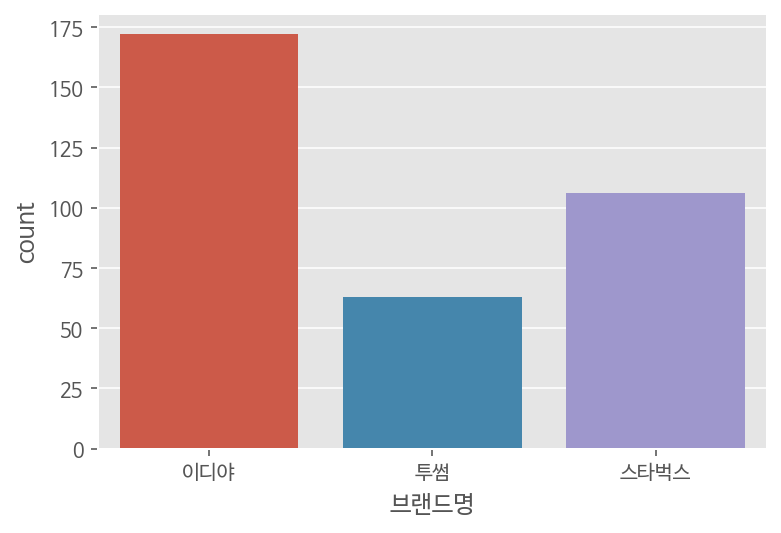

In [ ]:
sns.countplot(data = df_cafe, x = "브랜드명") #막대그래프화 - 점포수 비슷

### groupby로 구별 매장수 구하기

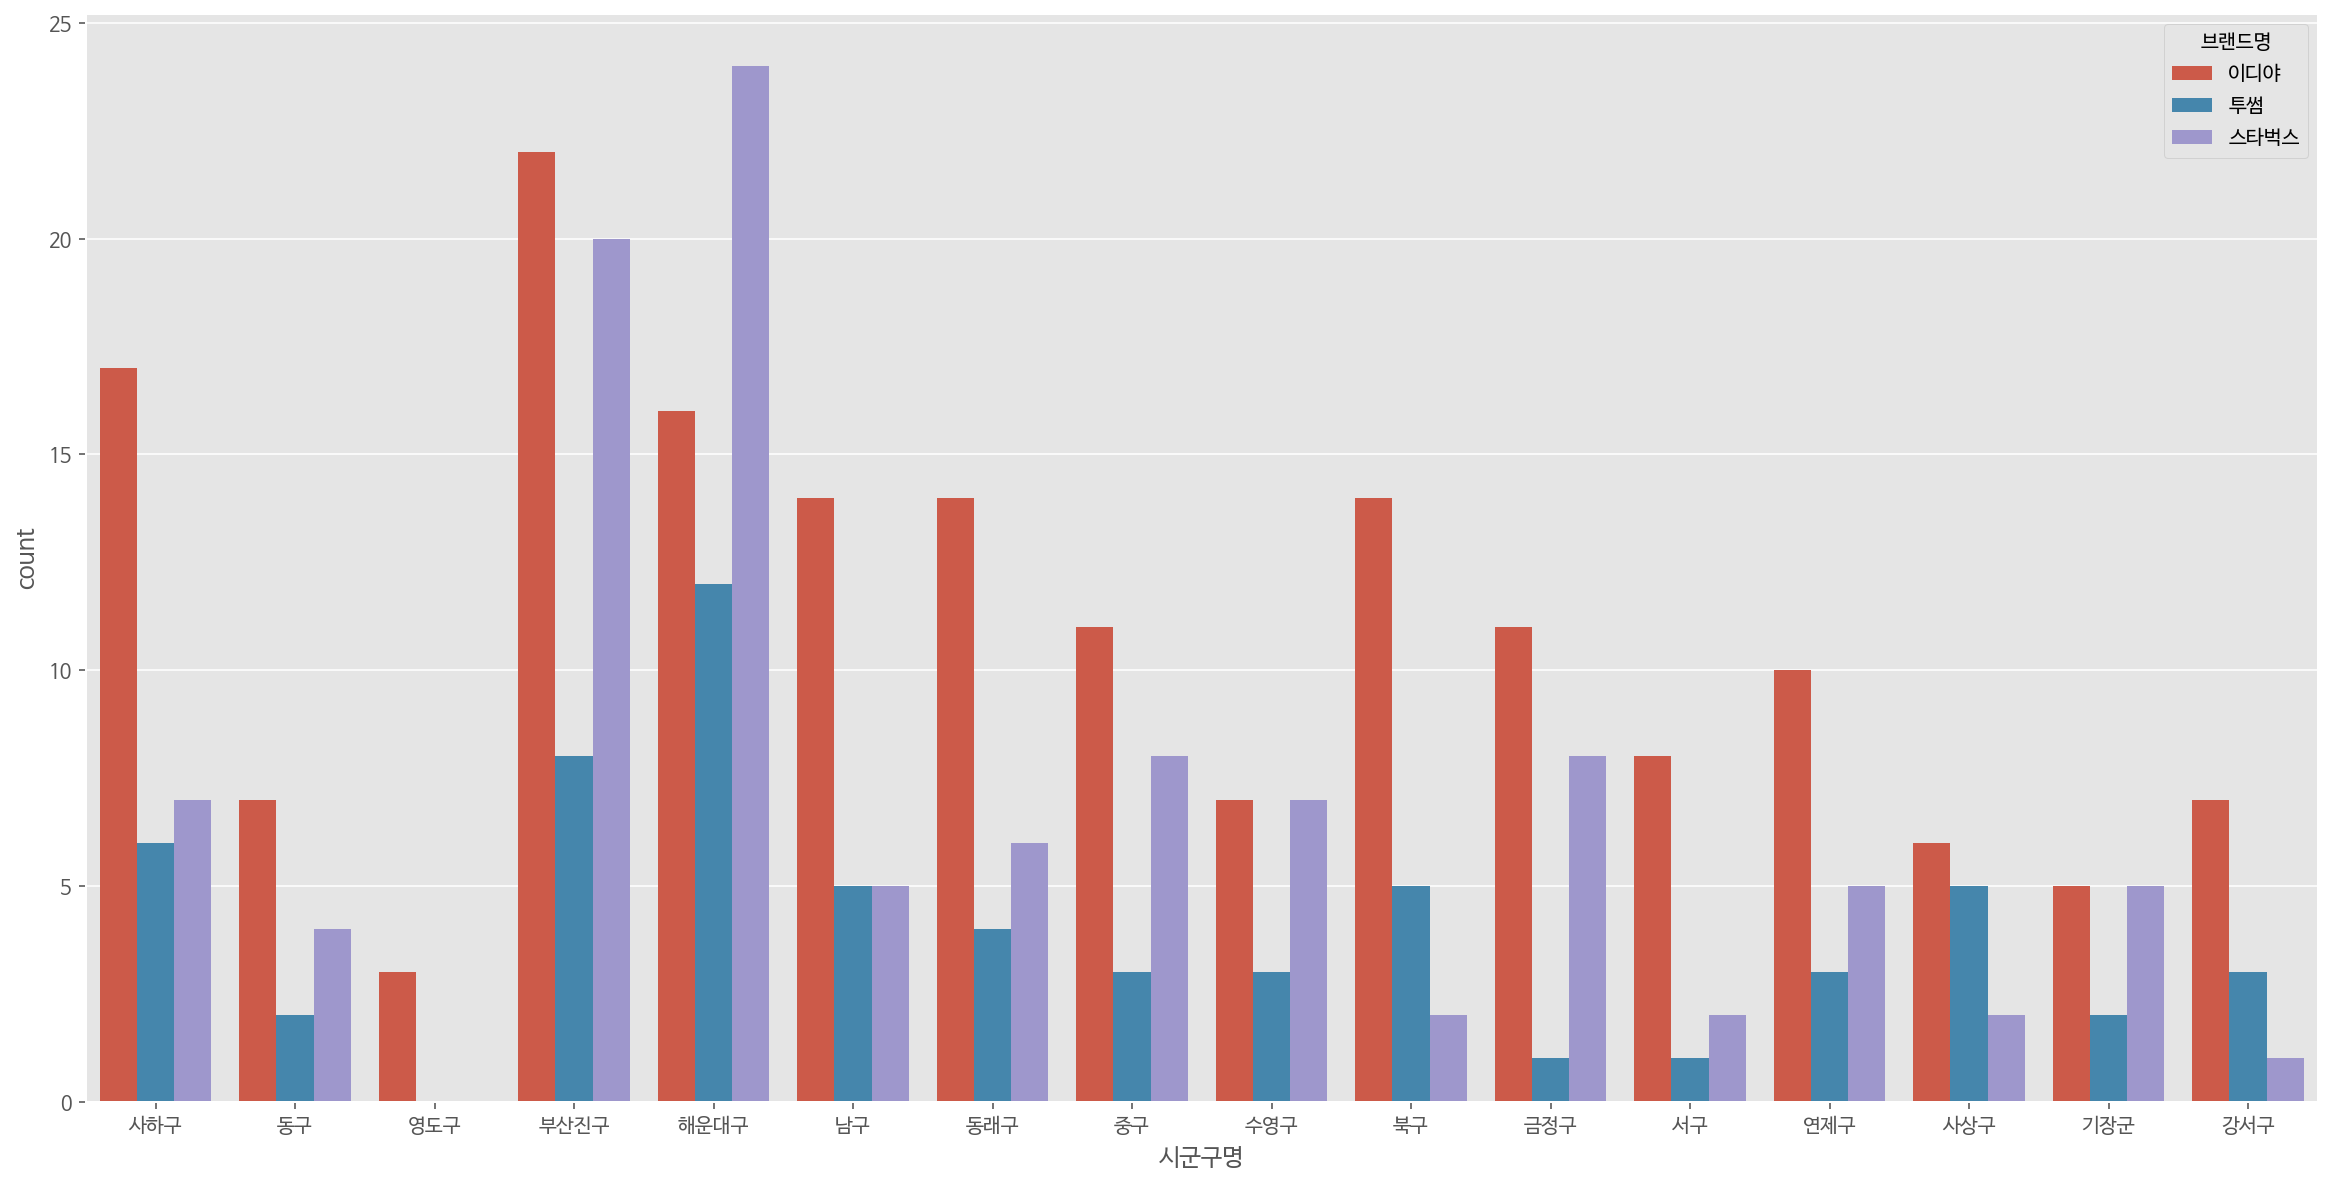

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(data = df_cafe, x = "시군구명", hue = "브랜드명") #각 시군구별 두 카페의 개수

In [ ]:
df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count().unstack() #구별로 브랜드별 점포수를 구함 

브랜드명,스타벅스,이디야,투썸
시군구명,,,
강서구,1.0,7.0,3.0
금정구,8.0,11.0,1.0
기장군,5.0,5.0,2.0
남구,5.0,14.0,5.0
동구,4.0,7.0,2.0
동래구,6.0,14.0,4.0
부산진구,20.0,22.0,8.0
북구,2.0,14.0,5.0
사상구,2.0,6.0,5.0


## 패스트푸드


In [ ]:
df_fastfood["브랜드명"].value_counts()

롯데리아    77
맥도날드    75
Name: 브랜드명, dtype: int64

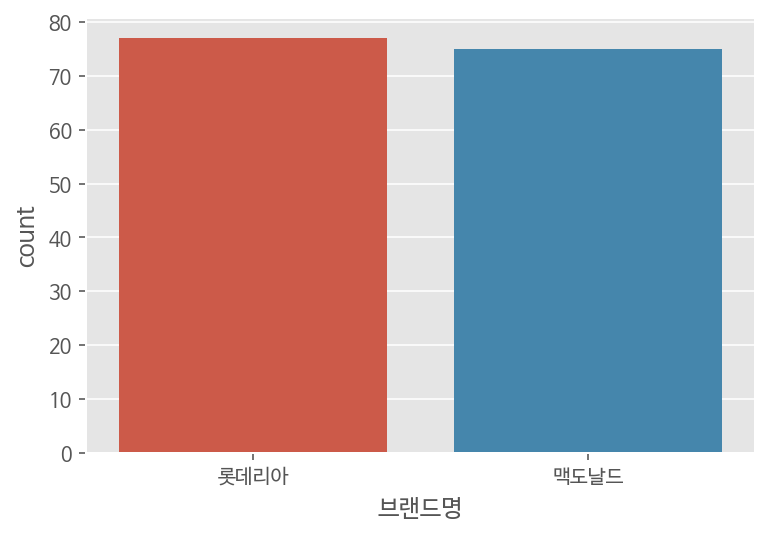

In [ ]:
sns.countplot(data = df_fastfood, x = "브랜드명")

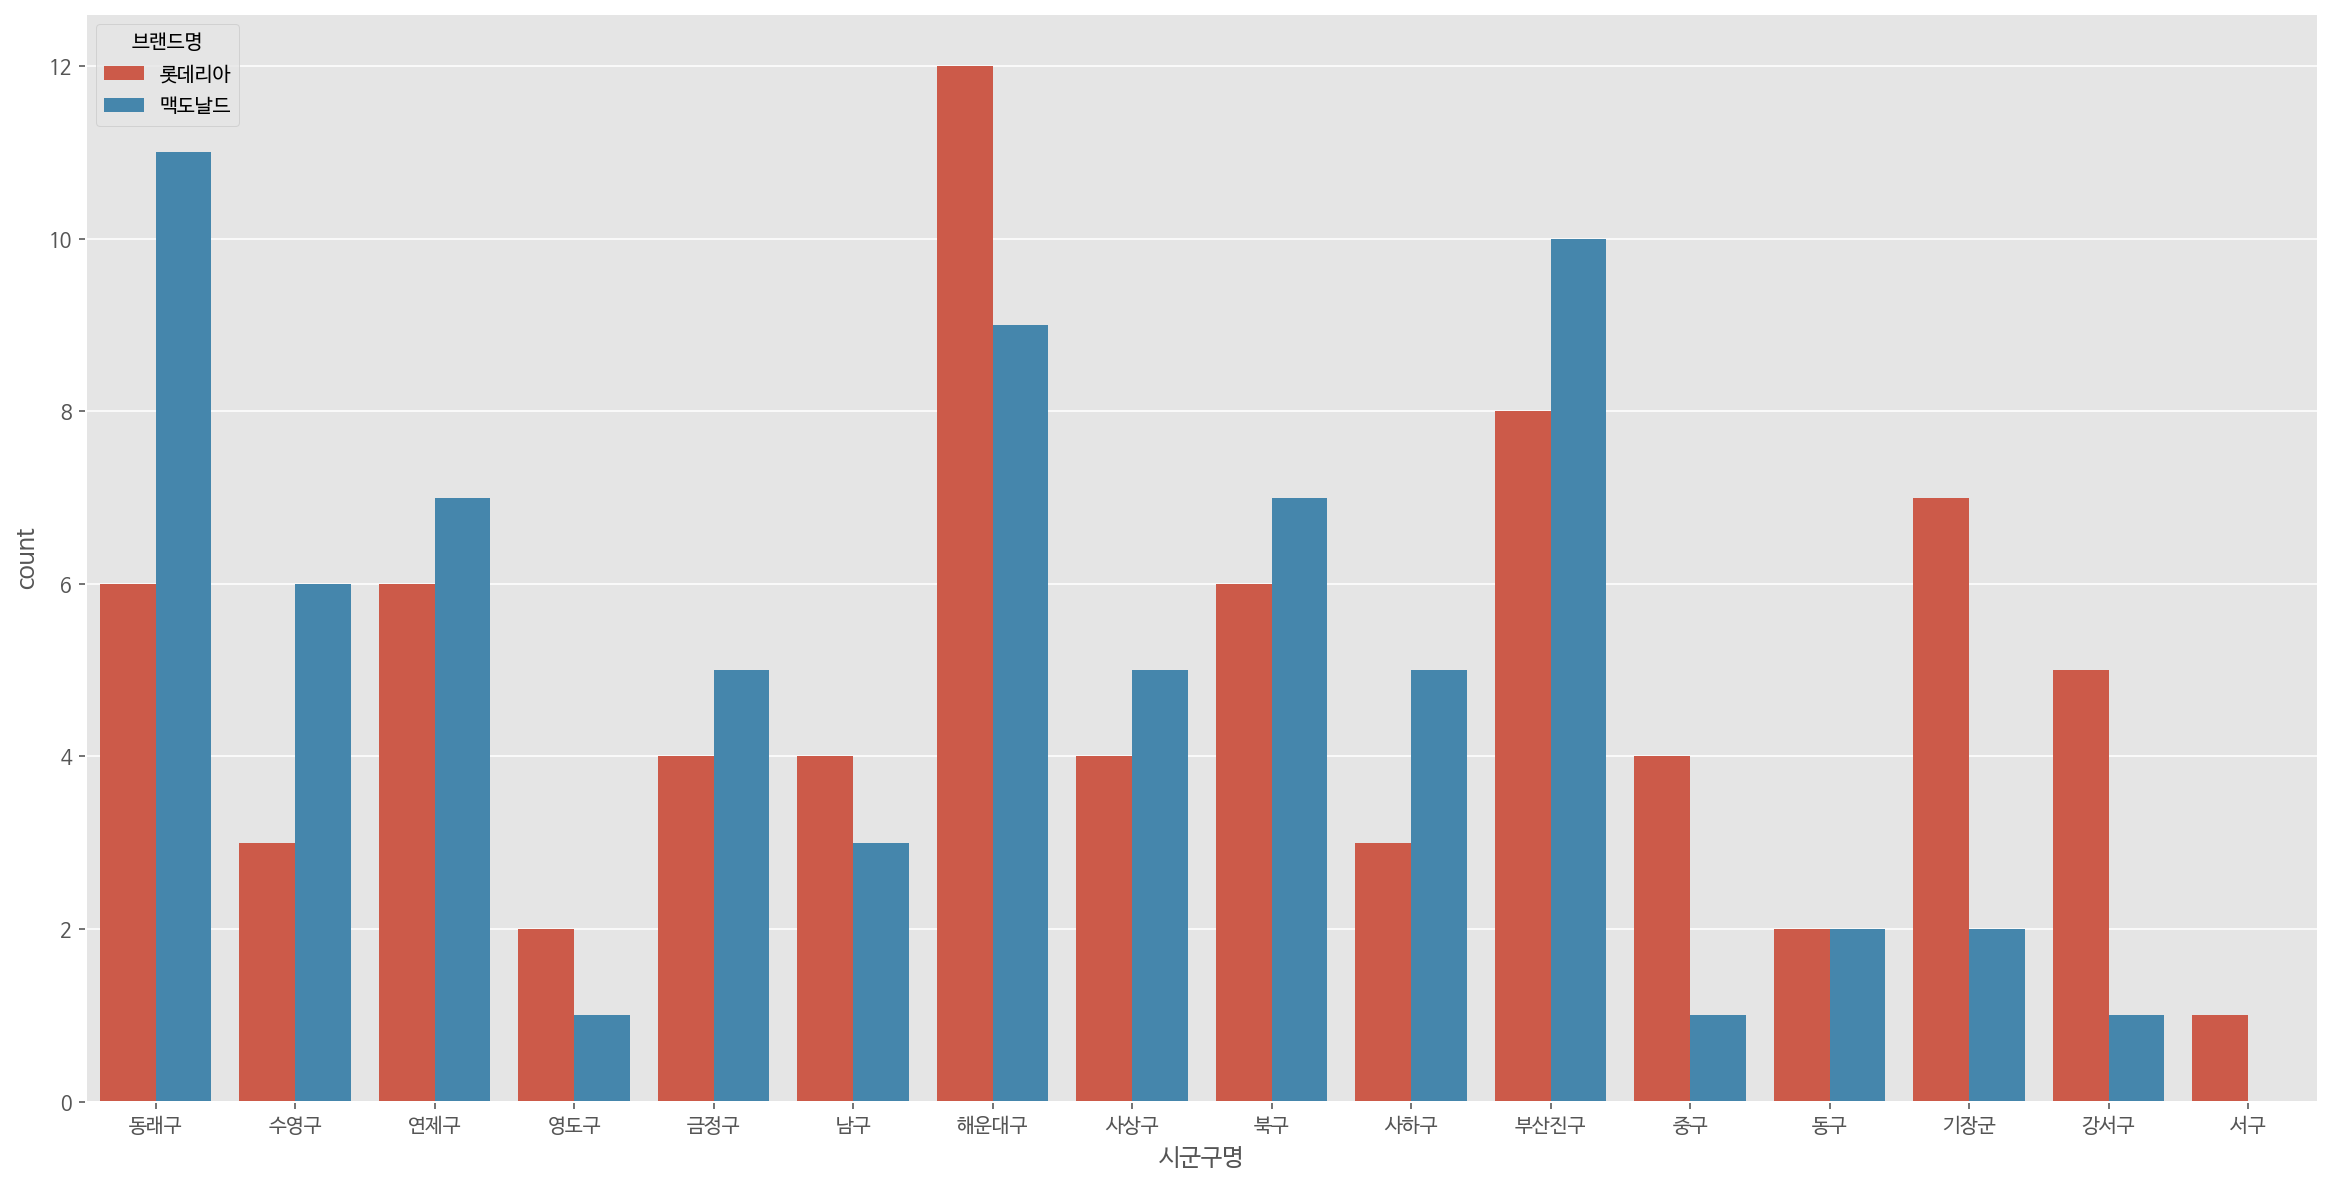

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(data = df_fastfood, x = "시군구명", hue = "브랜드명")

#지도 시각화

In [ ]:
import folium

## 카페 매장 전체 분포

In [ ]:
len(df_cafe) #df_cafe에 저장된 데이터의 수

341

In [ ]:
m = folium.Map(
    location = [df_cafe["위도"].mean(), #"위도" 컬럼의 평균을 대입
                df_cafe["경도"].mean() #"경도" 컬럼의 평균을 대입
                ],
    zoom_start = 12, 
    tiles = "Stamen Toner")

for i in range(len(df_cafe)):
  sub_lat = df_cafe["위도"].iloc[i] #위도 컬럼의 i번째 데이터
  sub_long = df_cafe["경도"].iloc[i] #경도 컬럼의 i번째 데이터

  #상호명-도로명 주소를 "title" 변수에 대입
  title = df_cafe["상호명"].iloc[i] + "-" + df_cafe["도로명주소"].iloc[i]

  if df_cafe["브랜드명"].iloc[i] == "이디야": #"브랜드명"에 따라 원 마커의 색 설정
    circle_color = "blue"
  elif df_cafe["브랜드명"].iloc[i] == "스타벅스":
    circle_color = "green"
  else:
    circle_color = "red"

  folium.CircleMarker(
      [sub_lat, sub_long],
      radius = 5,
      color = circle_color,
      fill = True,
      fill_color = circle_color,
      fill_opacity = 0.7,
      tooltip = title
  ).add_to(m)

In [ ]:
m

## 패스트푸드

In [ ]:
len(df_fastfood)

152

In [ ]:
m_food = folium.Map(
    location = [df_fastfood["위도"].mean(), #"위도" 컬럼의 평균을 대입
                df_fastfood["경도"].mean() #"경도" 컬럼의 평균을 대입
                ],
    zoom_start = 12, 
    tiles = "Stamen Toner")

for i in range(len(df_fastfood)):
  sub_lat = df_fastfood["위도"].iloc[i] #위도 컬럼의 i번째 데이터
  sub_long = df_fastfood["경도"].iloc[i] #경도 컬럼의 i번째 데이터

  #상호명-도로명 주소를 "title" 변수에 대입
  title = df_fastfood["상호명"].iloc[i] + "-" + df_fastfood["도로명주소"].iloc[i]

  if df_fastfood["브랜드명"].iloc[i] == "맥도날드": #"브랜드명"에 따라 원 마커의 색 설정
    circle_color = "yellow"
  else:
    circle_color = "red"

  folium.CircleMarker(
      [sub_lat, sub_long],
      radius = 5,
      color = circle_color,
      fill = True,
      fill_color = circle_color,
      fill_opacity = 0.7,
      tooltip = title
  ).add_to(m_food)

In [ ]:
m_food